**Problem tanımı ve amaç**: Bu veri seti ilk kez 2012 yılında yayınlanan 155 ülkeyi mutluluk seviyelerine göre sıralayan dünya mutluluk raporlarından oluşmaktadır.

Mutluluk seviyelerini belirlemek için 6 faktör -ekonomik üretim, sosyal destek, yaşam beklentisi, özgürlük, yolsuzluğun olmaması ve cömertlik - göz önüne alınmaktadır. Amaç günümüz dünyasında daha mutlu toplumlar oluşmasına katkı sağlamak için aşağıdaki gibi sorulara cevaplar arayabilmektir.

-Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor?
-2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti?
-Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?

# **1.Gerekli Kütüphaneler**

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2.Verileri okuma**

In [32]:
data_2015 = pd.read_csv('./world happiness dataset/2015.csv')
data_2016 = pd.read_csv('./world happiness dataset/2016.csv')
data_2017 = pd.read_csv('./world happiness dataset/2017.csv')
data_2018 = pd.read_csv('./world happiness dataset/2018.csv')
data_2019 = pd.read_csv('./world happiness dataset/2019.csv')
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [33]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [34]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [35]:
data_2015 = data_2015.rename(columns={"Happiness Score" : "Score"})
data_2015.head()

,Country,Region,Happiness Rank,Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [36]:
data_2016 = data_2016.rename(columns={"Happiness Score" : "Score"})
data_2016.head()

,Country,Region,Happiness Rank,Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [37]:
data_2017 = data_2017.rename(columns={"Happiness.Score" : "Score"})
data_2017.head()

,Country,Happiness.Rank,Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [38]:
data_2018 = data_2018.rename(columns={"Country or region" : "Country"})
data_2018.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [39]:
data_2019 = data_2019.rename(columns={"Country or region" : "Country"})
data_2019.head()

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [40]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Score                          158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# **Mutluluk Oranları**

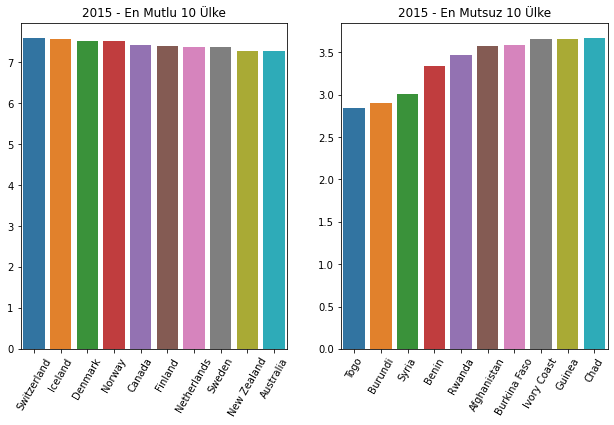

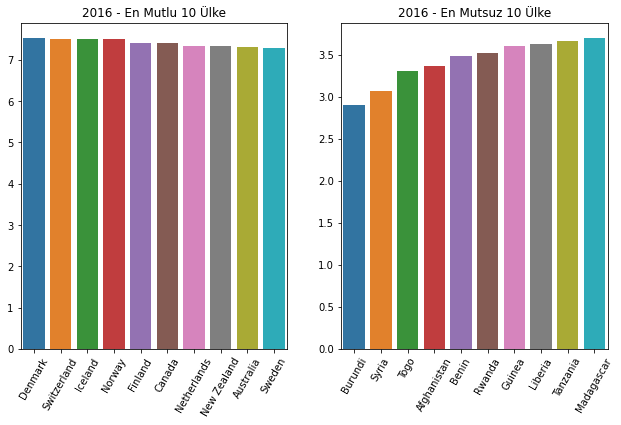

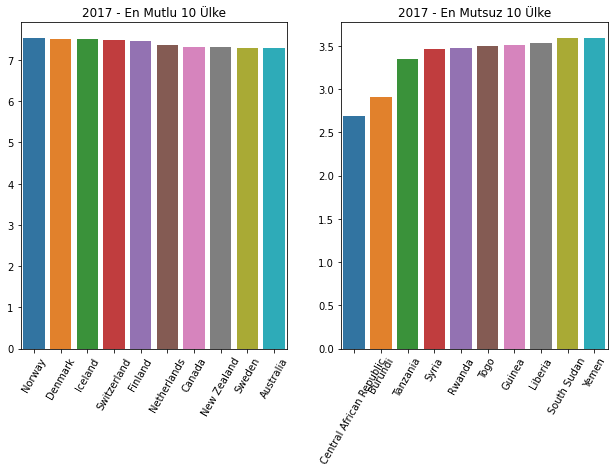

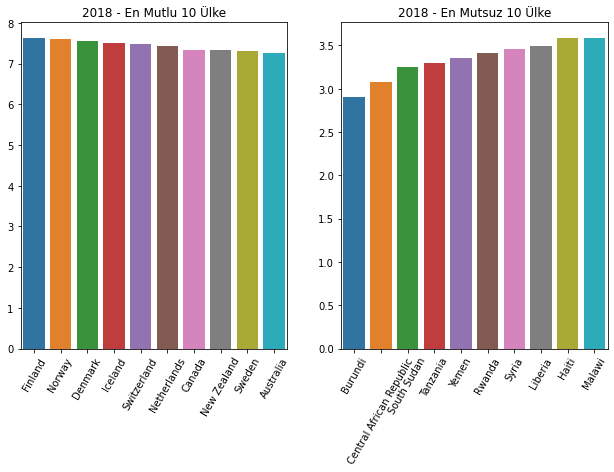

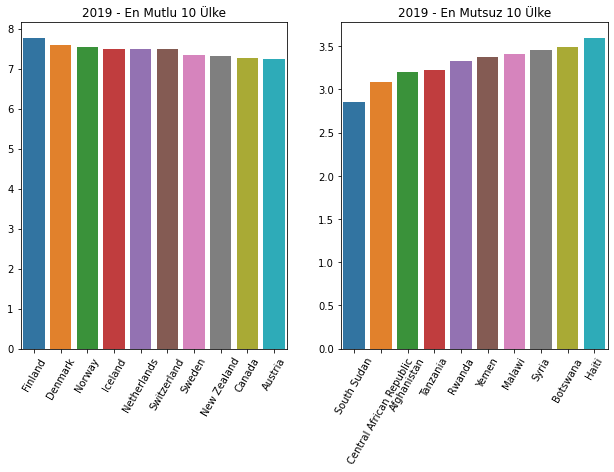

In [41]:
count=2015

for year in [data_2015,data_2016,data_2017,data_2018,data_2019]:
    
    plt.figure(figsize=(22, 6))
    
    plt.subplot(1, 4, 1)
    plt.title(f"{count} - En Mutlu 10 Ülke")
    sns.barplot(data=year.head(10), x="Country", y="Score")
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.subplot(1, 4, 2)
    plt.title(f"{count} - En Mutsuz 10 Ülke")
    sns.barplot(data= year.iloc[::-1].head(10), x="Country", y="Score")
    plt.grid(False)
    plt.xticks(rotation=60)
    plt.ylabel(None)
    plt.xlabel(None)
    
    plt.show()
    count += 1

# **Verileri Birleştirmek**

In [42]:
data1 = data_2015[["Country","Score"]]
data2 = data_2016[["Country","Score"]]
data3 = data_2017[["Country","Score"]]
data4 = data_2018[["Country","Score"]]
data5 = data_2019[["Country","Score"]]

In [43]:
data_list = [data1, data2, data3, data4, data5]

In [44]:
tablo = data_list[0]
count=2015
for df in data_list[1:]:
    tablo = pd.merge(tablo, df, on="Country")
    
tablo.columns = ["Country","2015","2016","2017","2018","2019"] 
tablo

<ipython-input-44-1aae99d0dea6>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Score_x'} in the result is deprecated and will raise a MergeError in a future version.
  tablo = pd.merge(tablo, df, on="Country")


,Country,2015,2016,2017,2018,2019
0,Switzerland,7.587,7.509,7.494,7.487,7.480
1,Iceland,7.561,7.501,7.504,7.495,7.494
2,Denmark,7.527,7.526,7.522,7.555,7.600
3,Norway,7.522,7.498,7.537,7.594,7.554
4,Canada,7.427,7.404,7.316,7.328,7.278
...,...,...,...,...,...,...
136,Rwanda,3.465,3.515,3.471,3.408,3.334
137,Benin,3.340,3.484,3.657,4.141,4.883
138,Syria,3.006,3.069,3.462,3.462,3.462
139,Burundi,2.905,2.905,2.905,2.905,3.775


# **Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı?**

In [45]:
tablo['2019-2015'] = tablo['2019'] - tablo['2015']
df = tablo.sort_values('2019-2015')
df

,Country,2015,2016,2017,2018,2019,2019-2015
21,Venezuela,6.810,6.084,5.250,4.806,4.707,-2.103
78,Zambia,5.129,4.795,4.514,4.377,4.107,-1.022
102,Zimbabwe,4.610,4.193,3.875,3.692,3.663,-0.947
105,Haiti,4.518,4.028,3.603,3.582,3.597,-0.921
116,Malawi,4.292,4.156,3.970,3.587,3.410,-0.882
...,...,...,...,...,...,...,...
134,Burkina Faso,3.587,3.739,4.032,4.424,4.587,1.000
92,Honduras,4.788,4.871,5.181,5.504,5.860,1.072
140,Togo,2.839,3.303,3.495,3.999,4.085,1.246
133,Ivory Coast,3.655,3.916,4.180,4.671,4.944,1.289


# **Mutluluk puanı en çok artan 10 ülke**

In [46]:
df.iloc[::-1].head(10)

,Country,2015,2016,2017,2018,2019,2019-2015
137,Benin,3.340,3.484,3.657,4.141,4.883,1.543
133,Ivory Coast,3.655,3.916,4.180,4.671,4.944,1.289
140,Togo,2.839,3.303,3.495,3.999,4.085,1.246
92,Honduras,4.788,4.871,5.181,5.504,5.860,1.072
134,Burkina Faso,3.587,3.739,4.032,4.424,4.587,1.000
91,Hungary,4.800,5.145,5.324,5.620,5.758,0.958
79,Romania,5.124,5.528,5.825,5.945,6.070,0.946
126,Gabon,3.896,4.121,4.465,4.758,4.799,0.903
128,Cambodia,3.819,3.907,4.168,4.433,4.700,0.881
132,Guinea,3.656,3.607,3.507,3.964,4.534,0.878


# **Mutluluk puanı en çok azalan 10 ülke**

In [47]:
df.head(10)

,Country,2015,2016,2017,2018,2019,2019-2015
21,Venezuela,6.810,6.084,5.250,4.806,4.707,-2.103
78,Zambia,5.129,4.795,4.514,4.377,4.107,-1.022
102,Zimbabwe,4.610,4.193,3.875,3.692,3.663,-0.947
105,Haiti,4.518,4.028,3.603,3.582,3.597,-0.921
116,Malawi,4.292,4.156,3.970,3.587,3.410,-0.882
113,Botswana,4.332,3.974,3.766,3.590,3.488,-0.844
121,Yemen,4.077,3.724,3.593,3.355,3.380,-0.697
15,Brazil,6.983,6.952,6.635,6.419,6.300,-0.683
103,Liberia,4.571,3.622,3.533,3.495,3.975,-0.596
13,Mexico,7.187,6.778,6.578,6.488,6.595,-0.592
